# Volunteers In Medicine Clinic (Stuart) EDA / Re-Admission Risk Calculator

### Andrew Dodds
#### 9/28/20

In [117]:
import pandas as pd
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score 
from sklearn import tree
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
print("Library Import Successful")

Library Import Successful


In [102]:
LR = LR()

In [103]:
df = pd.read_csv("C:/Users/thech/Desktop/train.csv")

In [104]:
df.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


#### EDA on Re-admission Rates

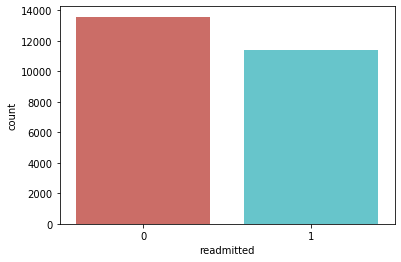

In [105]:
y.value_counts()
sns.countplot(x=y, data=df, palette='hls')
plt.show()

In [106]:
count_no_sub = len(df[df['readmitted'] ==0])
count_sub = len(df[df['readmitted']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("The percentage of Patients who are NOT Re-admitted is", round(pct_of_no_sub*100,2),"%")
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("The percentage of Re-Admitted Patients is", round(pct_of_sub*100,2),"%")

The percentage of Patients who are NOT Re-admitted is 54.36 %
The percentage of Re-Admitted Patients is 45.64 %


In [107]:
df.groupby('readmitted').mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes
readmitted,,,,,,,,,,,,,,,,,,,,,
0,4.237822,42.233996,1.419132,15.569610,0.268212,0.112656,0.392494,7.200662,0.731273,0.192494,...,1.0,1.0,0.490802,0.994923,0.999926,1.000000,1.0,1.0,0.565489,0.744224
1,4.583611,43.824978,1.248116,16.487292,0.482296,0.311218,0.941367,7.681595,0.755039,0.192901,...,1.0,1.0,0.442331,0.992112,0.999737,0.999912,1.0,1.0,0.515337,0.795004


#### There does not appear to be any distinguishing features in Patient Re-admissions

Text(0, 0.5, 'Number of Patients')

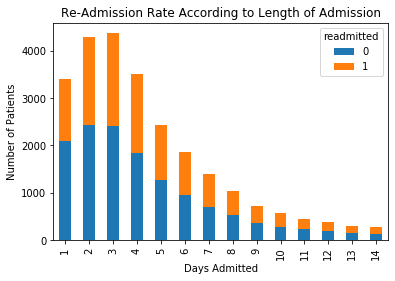

In [108]:
pd.crosstab(df.time_in_hospital,df.readmitted).plot(kind='bar', stacked=True)
plt.title('Re-Admission Rate According to Length of Admission')
plt.xlabel('Days Admitted')
plt.ylabel('Number of Patients')

#### Randomize the dataset and extract a training dataset at 80:20 split

In [120]:
df = df.sample(frac=1)
y=df.readmitted

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20000, 65) (20000,)
(5000, 65) (5000,)


In [122]:
LR.fit(X_train,y_train)

pred = LR.predict(X_test)
acc = accuracy_score(y.flatten(),pred)

TypeError: fit() missing 1 required positional argument: 'y'